# Description
### This dataset contains 6,899 images from 8 distinct classes compiled from various sources (see Acknowledgements). The classes include airplane, car, cat, dog, flower, fruit, motorbike and person.

# import lib

In [1]:
from IPython.display import Image, display
# preprocessing and processing
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
# ploting
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from tensorflow.keras.utils import plot_model
# split data
from sklearn.model_selection import train_test_split
# CNN
from keras import models, layers
# val
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# plot all images
from pathlib import Path
import random
from PIL import Image

In [2]:
import os

labels = os.listdir('../input/natural-images/data/natural_images/')
print(labels)

['motorbike', 'airplane', 'flower', 'dog', 'fruit', 'car', 'cat', 'person']


# show some images

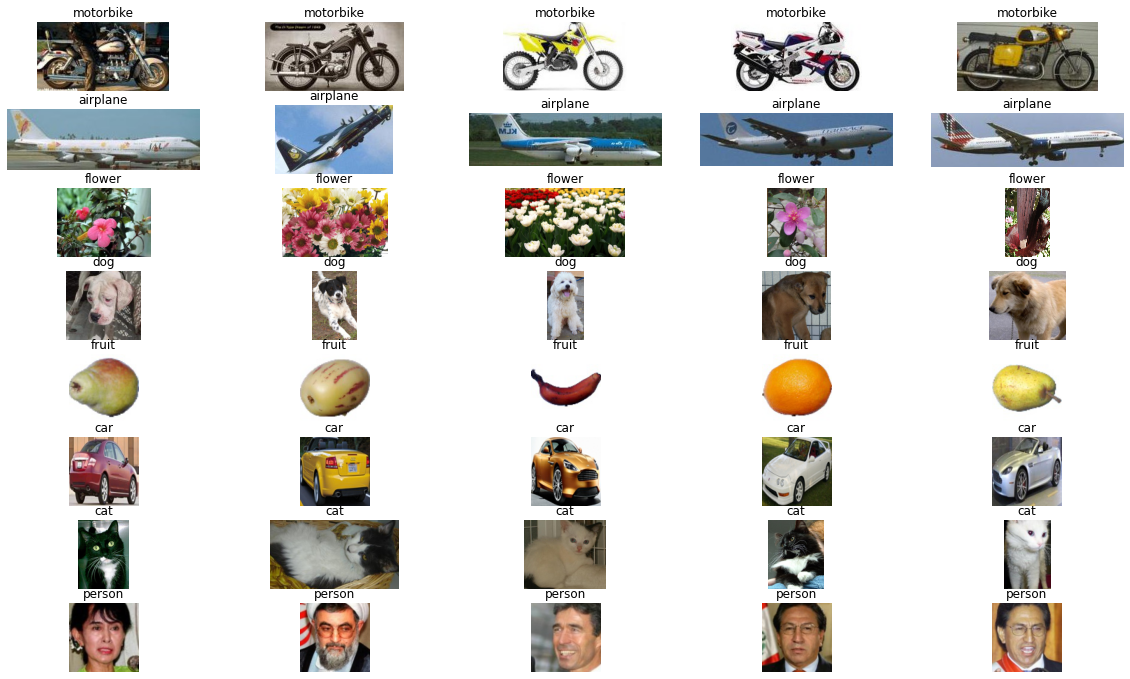

In [3]:
labels = os.listdir('../input/natural-images/data/natural_images/')
path = Path('/kaggle/input/natural-images/natural_images')
def displayRandomImagesFromEveryFolder(directory=path, samplesPerFolder=5):

    fig = plt.figure(figsize=(20,15))

    for rowIndex in range(1, 9):
        subdirectory = str(rowIndex)
        path = directory/labels[rowIndex -1]
        images = os.listdir(path)
        for sampleIndex in range(1,samplesPerFolder+1):
            randomNumber = random.randint(0, len(images)-1)
            image = Image.open(path/images[randomNumber])
            ax = fig.add_subplot(10, 5, samplesPerFolder*rowIndex + sampleIndex)
            ax.axis("off")

            plt.title(str(labels[rowIndex -1]))
            plt.imshow(image, cmap='gray')


    plt.show()

displayRandomImagesFromEveryFolder()

# vis count image for all classes

In [4]:
num = []
for label in labels:
    path = '../input/natural-images/data/natural_images/{0}/'.format(label)
    folder_data = os.listdir(path)
    k = 0
    # print('\n',f'=====   {label.upper()}   =====')
    for image_path in folder_data:
        if k < 5:
            #display(Image(path+image_path))
            pass
        k = k+1
    num.append(k)
#     print(f'count : {k} images , label : {label} class')

In [5]:
fig = go.Figure(data=[go.Bar(
            x=labels, y=num,
            text=num,
            textposition='auto',
        )])
fig.update_layout(title_text='NUMBER OF IMAGES CONTAINED IN EACH CLASS')
fig.show()

# show shaps and stadardizing input data

In [6]:
x_data =[]
y_data = []
import cv2
for label in labels:
    path = '../input/natural-images/data/natural_images/{0}/'.format(label)
    folder_data = os.listdir(path)
    for image_path in folder_data:
        image = cv2.imread(path+image_path)
        image_resized = cv2.resize(image, (120,120))
        x_data.append(np.array(image_resized))
        y_data.append(label)
        pass
    pass

x_data = np.array(x_data)
y_data = np.array(y_data)
print('the shape of X is: ', x_data.shape, 'and that of Y is: ', y_data.shape)
x_data = x_data.astype('float32')/255

the shape of X is:  (6899, 120, 120, 3) and that of Y is:  (6899,)


# converting y data into categorical data

In [7]:
y_encoded = LabelEncoder().fit_transform(y_data)
y_categorical = to_categorical(y_encoded)

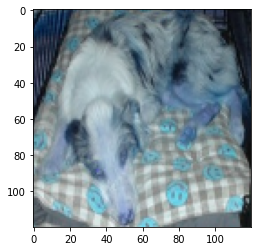

dog


In [8]:
r = 2999
x = x_data[r]
# x = x.reshape((28, 28))
plt.imshow(x)
plt.show()
print(y_data[r])

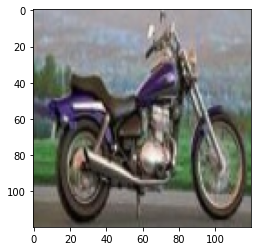

In [9]:
x = x_data[0]
# x = x.reshape((28, 28))
plt.imshow(x)
plt.show()
# x

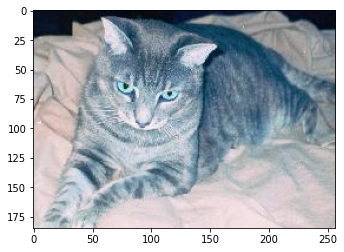

In [10]:
zz = cv2.imread('../input/natural-images/natural_images/cat/cat_0005.jpg')
plt.imshow(zz)
plt.show()

In [11]:
zz

array([[[ 11,  15,  33],
        [ 11,  15,  33],
        [ 13,  17,  35],
        ...,
        [ 10,  14,  25],
        [ 10,  14,  25],
        [  7,  13,  24]],

       [[ 10,  14,  32],
        [ 10,  14,  32],
        [ 11,  15,  33],
        ...,
        [  9,  13,  24],
        [ 10,  14,  25],
        [  7,  13,  24]],

       [[  8,  15,  32],
        [  8,  15,  32],
        [  9,  16,  33],
        ...,
        [  7,  13,  24],
        [  9,  15,  26],
        [  8,  12,  23]],

       ...,

       [[224, 213, 209],
        [221, 212, 208],
        [217, 208, 205],
        ...,
        [196, 188, 188],
        [201, 193, 193],
        [198, 188, 188]],

       [[226, 216, 216],
        [223, 215, 215],
        [221, 213, 214],
        ...,
        [199, 191, 191],
        [208, 198, 198],
        [205, 193, 193]],

       [[228, 218, 224],
        [226, 219, 224],
        [221, 215, 220],
        ...,
        [204, 195, 192],
        [206, 197, 194],
        [206, 194, 192]]

# shuffle data

In [12]:
r = np.arange(x_data.shape[0])
np.random.seed(42)
np.random.shuffle(r)
X = x_data[r]
Y = y_categorical[r]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33)

# create a CNN model

In [13]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(rate=0.25))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(8, activation='softmax'))

2022-12-25 07:01:20.341595: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


# compile the CNN model

In [14]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'])

# training model

In [15]:
history = model.fit(X_train, Y_train, epochs=20, validation_split=0.2)

2022-12-25 07:01:21.527277: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
116/116 [==============================] - 30s 247ms/step - loss: 1.0773 - accuracy: 0.6408 - val_loss: 0.4974 - val_accuracy: 0.8065
Epoch 2/20
116/116 [==============================] - 29s 246ms/step - loss: 0.4361 - accuracy: 0.8415 - val_loss: 0.3380 - val_accuracy: 0.8811
Epoch 3/20
116/116 [==============================] - 29s 246ms/step - loss: 0.3052 - accuracy: 0.8872 - val_loss: 0.2975 - val_accuracy: 0.8919
Epoch 4/20
116/116 [==============================] - 28s 239ms/step - loss: 0.2131 - accuracy: 0.9170 - val_loss: 0.2761 - val_accuracy: 0.9059
Epoch 5/20
116/116 [==============================] - 28s 245ms/step - loss: 0.1670 - accuracy: 0.9437 - val_loss: 0.4883 - val_accuracy: 0.8454
Epoch 6/20
116/116 [==============================] - 28s 245ms/step - loss: 0.1575 - accuracy: 0.9513 - val_loss: 0.3367 - val_accuracy: 0.9005
Epoch 7/20
116/116 [==============================] - 28s 244ms/step - loss: 0.0890 - accuracy: 0.9719 - val_loss: 0.3412 - val_ac

# Plot CNN model

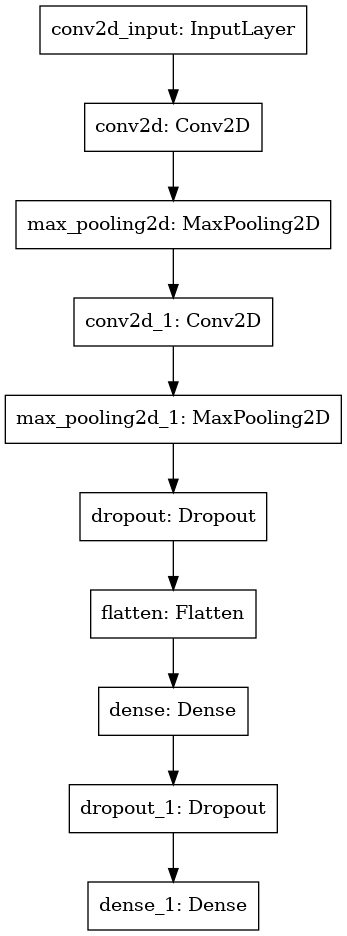

In [16]:
plot_model(model)

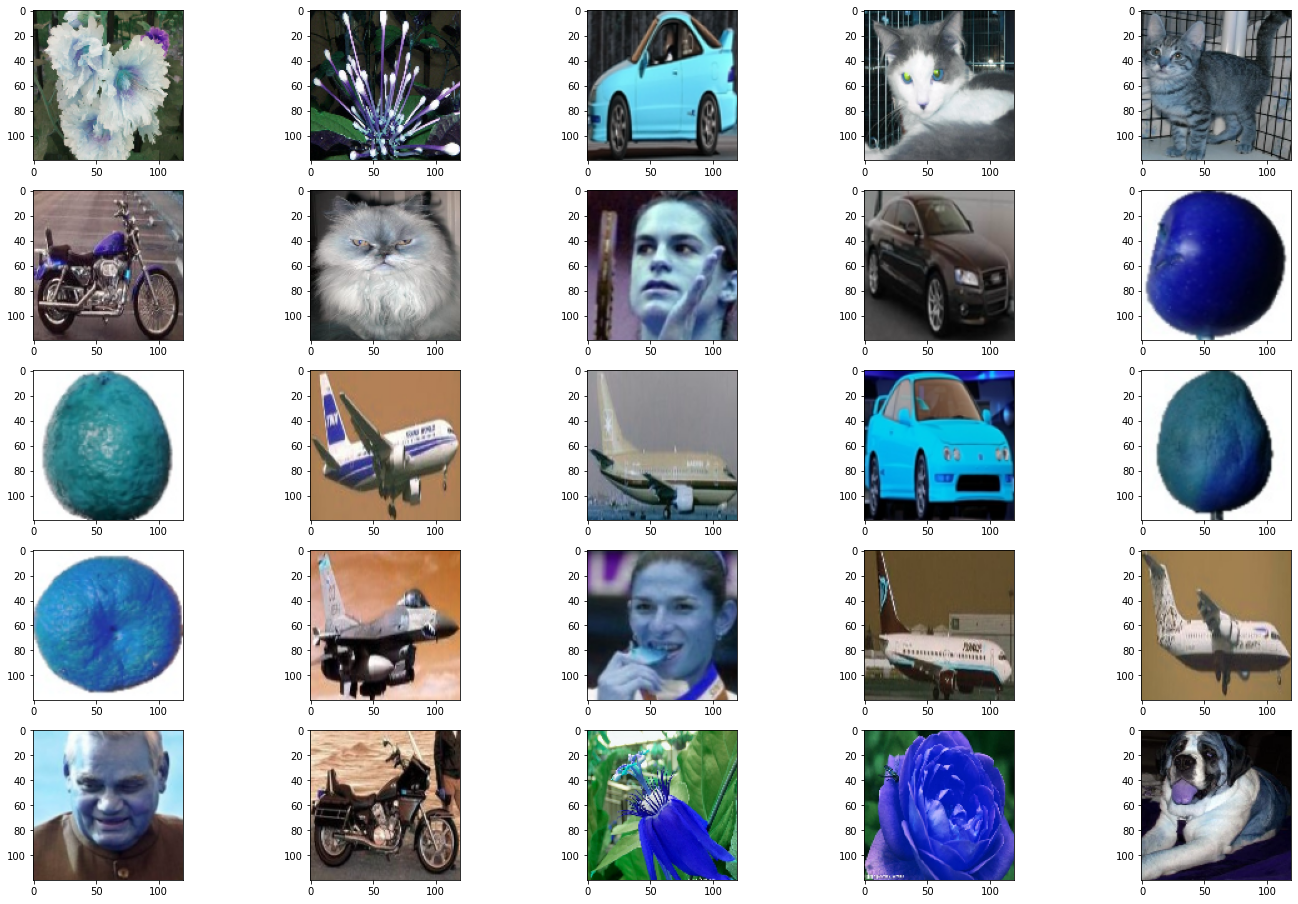

In [17]:
fig = plt.figure(figsize=(24, 16))

for s in range(len(X_test[:25])):
    numberplt = s+1
    fig.add_subplot(5, 5, numberplt)
    plt.imshow(X_test[s])
    pass

# Accuracy Score

In [18]:
Y_pred = np.argmax(model.predict(X_test), axis=1)
Y_test = np.argmax(Y_test, axis = 1)
print(Y_pred,'\n',Y_test)
accuracy_score(Y_pred,Y_test)

[4 4 1 ... 2 3 1] 
 [4 4 1 ... 2 3 1]


0.9073342116820378

In [19]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       261
           1       0.94      0.96      0.95       293
           2       0.73      0.77      0.75       285
           3       0.72      0.64      0.68       224
           4       0.89      0.90      0.89       286
           5       0.99      1.00      0.99       338
           6       0.99      0.99      0.99       266
           7       0.99      1.00      0.99       324

    accuracy                           0.91      2277
   macro avg       0.90      0.90      0.90      2277
weighted avg       0.91      0.91      0.91      2277



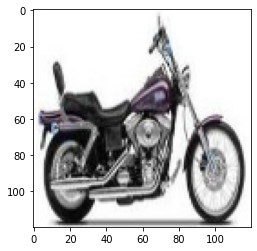

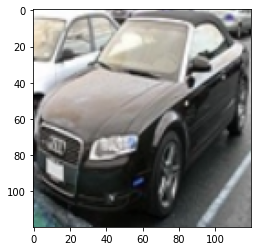

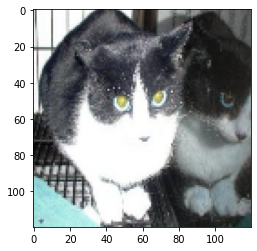

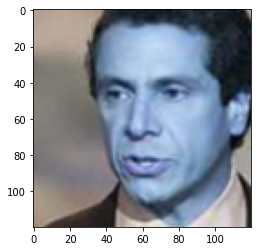

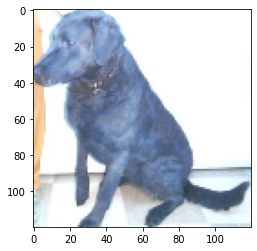

In [20]:
z = X_test[116:121]
for i in z:
    plt.imshow(i)
    plt.show()

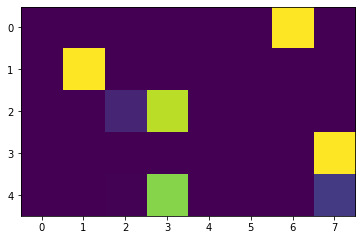

In [21]:
x = model.predict(X_test[116:121])
plt.imshow(x)
plt.show()

In [22]:
Y_pred[:20]

array([4, 4, 1, 3, 2, 6, 2, 7, 1, 5, 5, 0, 0, 1, 5, 5, 0, 7, 0, 0])

In [23]:
Y_test[:20]

array([4, 4, 1, 2, 2, 6, 2, 7, 1, 5, 5, 0, 0, 1, 5, 5, 0, 7, 0, 0])

# Notes
- Thank for reading my classification.

- If you any questions or advice me please write in the comment.

- If anyone has a model with a higher percentage, please tell me, its will support me .

# Vote
-  If you liked my work upvote me

# The End...